In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import mlflow

from steps.data_processing import data_processing_function

In [8]:
mlflow.autolog()

2023/05/18 18:06:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


Data loading

In [2]:
mydata = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
mydata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Adjustments - will be deleted !!!

In [3]:
data = data_processing_function(mydata)
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.761629,0.000000,0.592254,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.657509,0.514310,0.502439,0.743590,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.504242,0.000000,0.200000,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.457416,0.643126,0.463415,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.773260,0.000000,0.565854,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,0.528887,0.584846,0.404878,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
505,0.493326,0.000000,0.224390,0.743590,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
506,0.614587,0.000000,0.073171,0.358974,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
507,0.887339,0.000000,0.790244,0.743590,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


Splitting data set

In [6]:
from sklearn.model_selection import train_test_split
X = mydata.drop(['Loan_Status_Y'], axis=1)
y = mydata['Loan_Status_Y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [20]:
logistic_reg = LogisticRegression(solver='saga',max_iter=500,random_state=1)
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRacc = accuracy_score(y_test, y_pred)
print('Logistic regression accuracy: {:.2f}%'.format(LRacc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.67      1.00      0.81        83

    accuracy                           0.67       123
   macro avg       0.34      0.50      0.40       123
weighted avg       0.46      0.67      0.54       123

[[ 0 40]
 [ 0 83]]
Logistic regression accuracy: 67.48%


c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classificati

K-nearest neighbor (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

KNN best accuracy: 67.48%


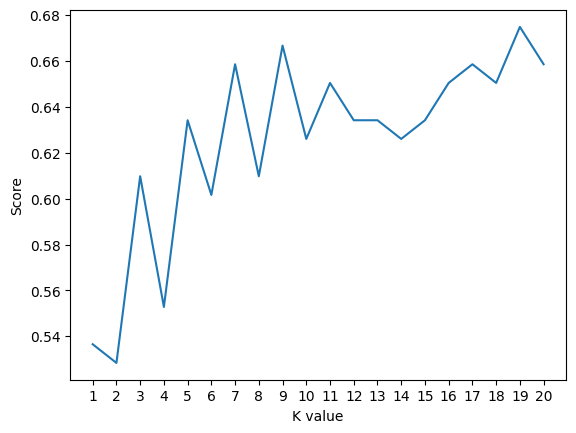

In [23]:
KNN_score = []
for i in range(1,21):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    KNN_score.append(KNN_model.score(X_test, y_test))

plt.plot(range(1,21), KNN_score)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
KNNacc = max(KNN_score)
print('KNN best accuracy: {:.2f}%'.format(KNNacc*100))

Support vector machine (SVM)

In [24]:
from sklearn.svm import SVC

In [30]:
SVM_model = SVC(kernel='rbf', max_iter=500)
SVM_model.fit(X_train, y_train)

y_pred = SVM_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVMacc = accuracy_score(y_test, y_pred)
print('SVM accuracy: {:.2f}%'.format(SVMacc*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.67      1.00      0.81        83

    accuracy                           0.67       123
   macro avg       0.34      0.50      0.40       123
weighted avg       0.46      0.67      0.54       123

[[ 0 40]
 [ 0 83]]
SVM accuracy: 67.48%


c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\svobo\AppData\Local\Programs\Python\Python311\Lib\sit

Naive Bayes (NB) - Categorical

In [31]:
from sklearn.naive_bayes import CategoricalNB

In [40]:
NBC_model = CategoricalNB()
NBC_model.fit(X_train, y_train)

y_pred = NBC_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NBCacc = accuracy_score(y_test, y_pred)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(NBCacc*100))

              precision    recall  f1-score   support

           0       0.89      0.42      0.58        40
           1       0.78      0.98      0.87        83

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.77       123

[[17 23]
 [ 2 81]]
Categorical Naive Bayes accuracy: 79.67%


Naive Bayes (NB) - Gaussian

In [32]:
from sklearn.naive_bayes import GaussianNB

In [46]:
NBG_model = GaussianNB()
NBG_model.fit(X_train, y_train)

y_pred = NBG_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
NGBacc = accuracy_score(y_test, y_pred)
print('Gaussian Naive Byas accuracy: {:.2f}%'.format(NGBacc*100))

              precision    recall  f1-score   support

           0       0.75      0.45      0.56        40
           1       0.78      0.93      0.85        83

    accuracy                           0.77       123
   macro avg       0.76      0.69      0.70       123
weighted avg       0.77      0.77      0.75       123

[[18 22]
 [ 6 77]]
Gaussian Naive Byas accuracy: 77.24%


Decision trees

In [47]:
from sklearn.tree import DecisionTreeClassifier

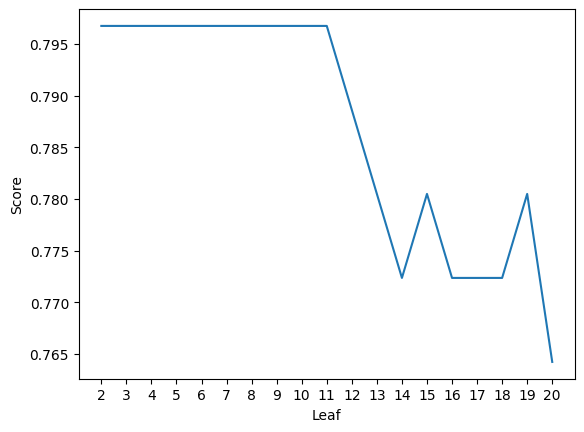

Decision tree accuracy: 79.67%


In [61]:
Tree_score = []
for i in range(2,21):
    Tree_model = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=i)
    Tree_model.fit(X_train, y_train)
    Tree_score.append(Tree_model.score(X_test, y_test))

plt.plot(range(2,21), Tree_score)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
TREEacc = max(Tree_score)
print('Decision tree accuracy: {:.2f}%'.format(TREEacc*100))
    

Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

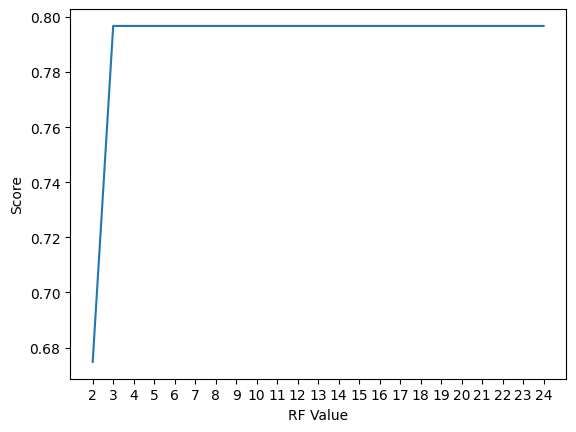

Random forest accuracy: 79.67%


In [60]:
Forest_score = []
for i in range(2,25):
    Forest_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=i)
    Forest_model.fit(X_train, y_train)
    Forest_score.append(Forest_model.score(X_test, y_test))
    
plt.plot(range(2,25), Forest_score)
plt.xticks(np.arange(2,25,1))
plt.xlabel('RF Value')
plt.ylabel('Score')
plt.show()
FORESTacc = max(Forest_score)
print('Random forest accuracy: {:.2f}%'.format(FORESTacc*100))

Model comparison

In [71]:
comparison = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'SVM', 'Categorical NB', 'Gaussian NB',
                                     'Decision tree', 'Random forest'], 
                           'Accuracy': [LRacc*100, KNNacc*100, SVMacc*100, NBCacc*100, NGBacc*100, 
                                        TREEacc*100, FORESTacc*100]})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
3,Categorical NB,79.674797
5,Decision tree,79.674797
6,Random forest,79.674797
4,Gaussian NB,77.235772
0,Logistic Regression,67.479675
1,KNN,67.479675
2,SVM,67.479675
